# Import Transformers Library

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

# Load Dataset

In [2]:
df = pd.read_csv("data\TRAIN\labeled_10k.csv")
df.head()

,hmid,moment,concepts,agency,social,age,country,gender,married,parenthood,reflection,duration
0,27674,I was happy when my son got 90% marks in his e...,education|family,no,yes,29.0,IND,m,married,y,24h,half_a_day
1,27685,went to movies with my friends it was fun,entertainment,yes,yes,29.0,IND,m,single,y,24h,half_a_day
2,27691,A hot kiss with my girl friend last night made...,romance,yes,yes,25.0,IND,m,married,y,24h,at_least_one_hour
3,27701,My son woke me up to a fantastic breakfast of ...,family|food,no,yes,79,USA,f,widowed,y,24h,all_day_im_still_feeling_it
4,27712,My older daughter keeps patting my younger dau...,family,no,yes,30,USA,f,married,y,24h,a_few_moment


In [3]:
df1 = pd.read_csv("data\TEST\labeled_17k.csv", encoding = "ISO-8859-1")
hmid = df1['hmid']
df1.head()

,hmid,moment,reflection,age,country,gender,duration,married,parenthood,concepts,agency,social
0,0,I was able to spend the day with my fiance sho...,24h,28,USA,m,all_day_im_still_feeling_it,single,n,shopping|family|romance,yes,no
1,1,I was able to play with my cat.,24h,28,USA,m,at_least_one_hour,single,n,animals,yes,no
2,2,I was able to clean my room and gold my laundry.,24h,28,USA,m,at_least_one_hour,single,n,0,yes,no
3,3,I spend the day at a party on the beach and I ...,24h,24,USA,m,half_a_day,single,n,vacation|party|weather,yes,yes
4,4,My cat greeting me when I got home from work -...,24h,24,USA,m,half_a_day,single,n,animals,no,no


In [4]:
df_unlabel = pd.read_csv("data\\TRAIN\\unlabeled_70k.csv", encoding = "ISO-8859-1")
df_unlabel.head()

,hmid,moment,age,country,gender,married,parenthood,reflection,duration
0,27673,I went on a successful date with someone I fel...,35.0,USA,m,single,n,24h,at_least_one_hour
1,27675,I went to the gym this morning and did yoga.,30.0,USA,f,married,y,24h,at_least_one_hour
2,27678,I meditated last night.,23.0,IND,m,single,n,24h,at_least_one_hour
3,27679,"I made a new recipe for peasant bread, and it ...",30.0,USA,m,single,n,24h,half_a_day
4,27680,I got gift from my elder brother which was rea...,23.0,IND,m,single,n,24h,at_least_one_hour


In [5]:
df1 = df1[['moment', 'agency', 'social']]
df1['agency'] = df1['agency'].map(
                   {'yes':1 ,'no':0})
df1['social'] = df1['social'].map(
                   {'yes':1 ,'no':0})
df1.head()

,moment,agency,social
0,I was able to spend the day with my fiance sho...,1,0
1,I was able to play with my cat.,1,0
2,I was able to clean my room and gold my laundry.,1,0
3,I spend the day at a party on the beach and I ...,1,1
4,My cat greeting me when I got home from work -...,0,0


In [6]:
df = df[['moment', 'agency', 'social']]
df['agency'] = df['agency'].map(
                   {'yes':1 ,'no':0})
df['social'] = df['social'].map(
                   {'yes':1 ,'no':0})
df.head()

,moment,agency,social
0,I was happy when my son got 90% marks in his e...,0,1
1,went to movies with my friends it was fun,1,1
2,A hot kiss with my girl friend last night made...,1,1
3,My son woke me up to a fantastic breakfast of ...,0,1
4,My older daughter keeps patting my younger dau...,0,1


In [7]:
df_unlabel = df_unlabel['moment']

df_unlabel.head()

0    I went on a successful date with someone I fel...
1         I went to the gym this morning and did yoga.
2                              I meditated last night.
3    I made a new recipe for peasant bread, and it ...
4    I got gift from my elder brother which was rea...
Name: moment, dtype: object

In [8]:
df1.shape

(17215, 3)

In [9]:
df1['agency'].value_counts(normalize = True)

1    0.706128
0    0.293872
Name: agency, dtype: float64

In [10]:
df.shape

(10560, 3)

In [11]:
# check class distribution
df['agency'].value_counts(normalize = True)
df['social'].value_counts(normalize = True)

1    0.53267
0    0.46733
Name: social, dtype: float64

In [12]:
test_text = df1['moment'];
test_labels = df1['social']

# Split train dataset into train, validation and test sets

In [13]:
train_text, val_text, train_labels, val_labels = train_test_split(df['moment'], df['social'], 
                                                                    random_state=2018, 
                                                                    test_size=0.2, 
                                                                    stratify=df['social'])

# we will use temp_text and temp_labels to create validation and test set
#val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
#                                                                random_state=2018, 
#                                                               test_size=0.5, 
#                                                               stratify=temp_labels)

# Import BERT Model and BERT Tokenizer

In [14]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [15]:
# sample data
text = ["this is a bert model tutorial", "we will fine-tune a bert model"]

# encode text
sent_id = tokenizer.batch_encode_plus(text, padding=True, return_token_type_ids=False)

In [16]:
# output
print(sent_id)

{'input_ids': [[101, 2023, 2003, 1037, 14324, 2944, 14924, 4818, 102, 0], [101, 2057, 2097, 2986, 1011, 8694, 1037, 14324, 2944, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


# Tokenization

<AxesSubplot:>

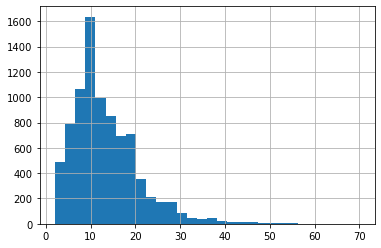

In [17]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [18]:
max_seq_len = 40

In [19]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the unlabeled training set
tokens_unlabel_train = tokenizer.batch_encode_plus(
    df_unlabel.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

C:\Users\matan\Documents\Documents\Code\Anaconda\envs\torch\lib\site-packages\transformers\tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


# Convert Integer Sequences to Tensors

In [20]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

# for unlabel train
unlabel_train_seq = torch.tensor(tokens_unlabel_train['input_ids'])
unlabel_train_mask = torch.tensor(tokens_unlabel_train['attention_mask'])

# Create DataLoaders

In [21]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

# Freeze BERT Parameters

In [22]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

# Define Model Architecture

In [23]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
        
        super(BERT_Arch, self).__init__()

        self.bert = bert 
      
        # dropout layer
        self.dropout = nn.Dropout(0.1)
      
        # relu activation function
        self.relu =  nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768,512)
      
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512,2)

        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

        #pass the inputs to the model  
        cls_hs = model.bert(sent_id, attention_mask=mask)['pooler_output']
      
        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)
      
        # apply softmax activation
        x = self.softmax(x)

        return x

In [24]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [25]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-3)

# Find Class Weights

In [26]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_wts = compute_class_weight('balanced', np.unique(train_labels), train_labels)

print(class_wts)

[1.06990881 0.93866667]


C:\Users\matan\Documents\Documents\Code\Anaconda\envs\torch\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=1557    0
2551    0
3226    0
8521    0
147     0
       ..
6422    0
6408    1
4979    0
4792    1
2675    0
Name: social, Length: 8448, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [27]:
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 100

# Fine-Tune BERT

In [28]:
# function to train the model
def train():
  
    model.train()

    total_loss, total_accuracy = 0, 0
  
    # empty list to save model predictions
    total_preds=[]
  
    # iterate over batches
    for step,batch in enumerate(train_dataloader):
    
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

        # push the batch to gpu
        batch = [r.to(device) for r in batch]
 
        sent_id, mask, labels = batch

        # clear previously calculated gradients 
        model.zero_grad()        

        # get model predictions for the current batch
        preds = model(sent_id, mask)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        # model predictions are stored on GPU. So, push it to CPU
        preds=preds.detach().cpu().numpy()

        # append the model predictions
        total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
  
    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds

In [29]:
# function for evaluating the model
def evaluate():
  
    print("\nEvaluating...")
  
    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0
  
    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step,batch in enumerate(val_dataloader):
    
        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
                  
          # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():
            
            # model predictions
            preds = model(sent_id, mask)
            
            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)
            
            total_loss = total_loss + loss.item()
            
            preds = preds.detach().cpu().numpy()
            
            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader) 
    
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)
    return avg_loss, total_preds

In [30]:
def trainEpoch():
    # set initial loss to infinite
    best_valid_loss = float('inf')

    # empty lists to store training and validation loss of each epoch
    train_losses=[]
    valid_losses=[]

    #for each epoch
    for epoch in range(epochs):
     
        print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
        #train model
        train_loss, _ = train()
    
        #evaluate model
        valid_loss, _ = evaluate()
    
        #save the best model
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), 'saved_weights.pt')
    
        # append training and validation loss
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
    
        print(f'\nTraining Loss: {train_loss:.3f}')
        print(f'Validation Loss: {valid_loss:.3f}')

# Start Model Training

In [31]:
import torch.nn.functional as func

train_iter = 3
threshold = 0.95

for i in range(train_iter):
    
    # create dataloader
    train_data = TensorDataset(train_seq, train_mask, train_y)
    train_sampler = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
    
    # prepare batches
    for batch in train_dataloader:
        sentid, mask, label = [b.to(device) for b in batch]
        break
    pre = model(sentid, mask)
    trainEpoch()
    
    # predict the unlabel data
    preds = []
    for i in range(len(unlabel_train_seq) // 1000 + 1):
        temp_seq = unlabel_train_seq[i * 1000 : (i + 1) * 1000]
        temp_mask = unlabel_train_mask[i * 1000 : (i + 1) * 1000]
        pred = model(temp_seq.to(device), temp_mask.to(device)).detach().cpu()
        preds.append(pred)
    preds = torch.cat(preds, dim = 0)
    prob = func.softmax(preds, dim=1)
    y_unlabel_ = np.argmax(preds.numpy(), axis = 1)
    y_unlabel = torch.tensor(y_unlabel_.tolist())
    
    # select the unlabel data with high confidence
    max_proba = np.max(prob.numpy(), axis=1)
    selected = max_proba > threshold
    
    selected_unlabel_train_seq = unlabel_train_seq[selected]
    selected_unlabel_train_mask = unlabel_train_mask[selected]
    selected_y_unlabel = y_unlabel[selected]
    
    # append the labeled data to train dataset
    train_seq = torch.cat((train_seq,selected_unlabel_train_seq),0)
    train_mask  = torch.cat((train_mask ,selected_unlabel_train_mask),0)
    train_y  = torch.cat((train_y ,selected_y_unlabel),0)
    
    # remove the  data from unlabeled train dataset
    unlabel_train_seq = unlabel_train_seq[~selected]
    unlabel_train_mask = unlabel_train_mask[~selected]



 Epoch 1 / 100
  Batch    50  of    264.
  Batch   100  of    264.
  Batch   150  of    264.
  Batch   200  of    264.
  Batch   250  of    264.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.609
Validation Loss: 0.457

 Epoch 2 / 100
  Batch    50  of    264.
  Batch   100  of    264.
  Batch   150  of    264.
  Batch   200  of    264.
  Batch   250  of    264.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.502
Validation Loss: 0.409

 Epoch 3 / 100
  Batch    50  of    264.
  Batch   100  of    264.
  Batch   150  of    264.
  Batch   200  of    264.
  Batch   250  of    264.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.467
Validation Loss: 0.382

 Epoch 4 / 100
  Batch    50  of    264.
  Batch   100  of    264.
  Batch   150  of    264.
  Batch   200  of    264.
  Batch   250  of    264.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.454
Validation Loss: 0.474

 Epoch 5 / 100
  Batch    50  of    264.
  Batch   100  of    264.
  Ba

  Batch   150  of    264.
  Batch   200  of    264.
  Batch   250  of    264.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.366
Validation Loss: 0.455

 Epoch 37 / 100
  Batch    50  of    264.
  Batch   100  of    264.
  Batch   150  of    264.
  Batch   200  of    264.
  Batch   250  of    264.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.350
Validation Loss: 0.393

 Epoch 38 / 100
  Batch    50  of    264.
  Batch   100  of    264.
  Batch   150  of    264.
  Batch   200  of    264.
  Batch   250  of    264.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.365
Validation Loss: 0.319

 Epoch 39 / 100
  Batch    50  of    264.
  Batch   100  of    264.
  Batch   150  of    264.
  Batch   200  of    264.
  Batch   250  of    264.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.351
Validation Loss: 0.337

 Epoch 40 / 100
  Batch    50  of    264.
  Batch   100  of    264.
  Batch   150  of    264.
  Batch   200  of    264.
  Batch   250  o

  Batch   250  of    264.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.334
Validation Loss: 0.303

 Epoch 72 / 100
  Batch    50  of    264.
  Batch   100  of    264.
  Batch   150  of    264.
  Batch   200  of    264.
  Batch   250  of    264.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.341
Validation Loss: 0.328

 Epoch 73 / 100
  Batch    50  of    264.
  Batch   100  of    264.
  Batch   150  of    264.
  Batch   200  of    264.
  Batch   250  of    264.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.344
Validation Loss: 0.310

 Epoch 74 / 100
  Batch    50  of    264.
  Batch   100  of    264.
  Batch   150  of    264.
  Batch   200  of    264.
  Batch   250  of    264.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.341
Validation Loss: 0.341

 Epoch 75 / 100
  Batch    50  of    264.
  Batch   100  of    264.
  Batch   150  of    264.
  Batch   200  of    264.
  Batch   250  of    264.

Evaluating...
  Batch    50  of     66.



  Batch 1,000  of  1,415.
  Batch 1,050  of  1,415.
  Batch 1,100  of  1,415.
  Batch 1,150  of  1,415.
  Batch 1,200  of  1,415.
  Batch 1,250  of  1,415.
  Batch 1,300  of  1,415.
  Batch 1,350  of  1,415.
  Batch 1,400  of  1,415.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.104
Validation Loss: 0.413

 Epoch 3 / 100
  Batch    50  of  1,415.
  Batch   100  of  1,415.
  Batch   150  of  1,415.
  Batch   200  of  1,415.
  Batch   250  of  1,415.
  Batch   300  of  1,415.
  Batch   350  of  1,415.
  Batch   400  of  1,415.
  Batch   450  of  1,415.
  Batch   500  of  1,415.
  Batch   550  of  1,415.
  Batch   600  of  1,415.
  Batch   650  of  1,415.
  Batch   700  of  1,415.
  Batch   750  of  1,415.
  Batch   800  of  1,415.
  Batch   850  of  1,415.
  Batch   900  of  1,415.
  Batch   950  of  1,415.
  Batch 1,000  of  1,415.
  Batch 1,050  of  1,415.
  Batch 1,100  of  1,415.
  Batch 1,150  of  1,415.
  Batch 1,200  of  1,415.
  Batch 1,250  of  1,415.
  Batch 1,300 

  Batch   800  of  1,415.
  Batch   850  of  1,415.
  Batch   900  of  1,415.
  Batch   950  of  1,415.
  Batch 1,000  of  1,415.
  Batch 1,050  of  1,415.
  Batch 1,100  of  1,415.
  Batch 1,150  of  1,415.
  Batch 1,200  of  1,415.
  Batch 1,250  of  1,415.
  Batch 1,300  of  1,415.
  Batch 1,350  of  1,415.
  Batch 1,400  of  1,415.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.103
Validation Loss: 0.395

 Epoch 13 / 100
  Batch    50  of  1,415.
  Batch   100  of  1,415.
  Batch   150  of  1,415.
  Batch   200  of  1,415.
  Batch   250  of  1,415.
  Batch   300  of  1,415.
  Batch   350  of  1,415.
  Batch   400  of  1,415.
  Batch   450  of  1,415.
  Batch   500  of  1,415.
  Batch   550  of  1,415.
  Batch   600  of  1,415.
  Batch   650  of  1,415.
  Batch   700  of  1,415.
  Batch   750  of  1,415.
  Batch   800  of  1,415.
  Batch   850  of  1,415.
  Batch   900  of  1,415.
  Batch   950  of  1,415.
  Batch 1,000  of  1,415.
  Batch 1,050  of  1,415.
  Batch 1,100

  Batch   600  of  1,415.
  Batch   650  of  1,415.
  Batch   700  of  1,415.
  Batch   750  of  1,415.
  Batch   800  of  1,415.
  Batch   850  of  1,415.
  Batch   900  of  1,415.
  Batch   950  of  1,415.
  Batch 1,000  of  1,415.
  Batch 1,050  of  1,415.
  Batch 1,100  of  1,415.
  Batch 1,150  of  1,415.
  Batch 1,200  of  1,415.
  Batch 1,250  of  1,415.
  Batch 1,300  of  1,415.
  Batch 1,350  of  1,415.
  Batch 1,400  of  1,415.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.098
Validation Loss: 0.432

 Epoch 23 / 100
  Batch    50  of  1,415.
  Batch   100  of  1,415.
  Batch   150  of  1,415.
  Batch   200  of  1,415.
  Batch   250  of  1,415.
  Batch   300  of  1,415.
  Batch   350  of  1,415.
  Batch   400  of  1,415.
  Batch   450  of  1,415.
  Batch   500  of  1,415.
  Batch   550  of  1,415.
  Batch   600  of  1,415.
  Batch   650  of  1,415.
  Batch   700  of  1,415.
  Batch   750  of  1,415.
  Batch   800  of  1,415.
  Batch   850  of  1,415.
  Batch   900

  Batch   400  of  1,415.
  Batch   450  of  1,415.
  Batch   500  of  1,415.
  Batch   550  of  1,415.
  Batch   600  of  1,415.
  Batch   650  of  1,415.
  Batch   700  of  1,415.
  Batch   750  of  1,415.
  Batch   800  of  1,415.
  Batch   850  of  1,415.
  Batch   900  of  1,415.
  Batch   950  of  1,415.
  Batch 1,000  of  1,415.
  Batch 1,050  of  1,415.
  Batch 1,100  of  1,415.
  Batch 1,150  of  1,415.
  Batch 1,200  of  1,415.
  Batch 1,250  of  1,415.
  Batch 1,300  of  1,415.
  Batch 1,350  of  1,415.
  Batch 1,400  of  1,415.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.097
Validation Loss: 0.330

 Epoch 33 / 100
  Batch    50  of  1,415.
  Batch   100  of  1,415.
  Batch   150  of  1,415.
  Batch   200  of  1,415.
  Batch   250  of  1,415.
  Batch   300  of  1,415.
  Batch   350  of  1,415.
  Batch   400  of  1,415.
  Batch   450  of  1,415.
  Batch   500  of  1,415.
  Batch   550  of  1,415.
  Batch   600  of  1,415.
  Batch   650  of  1,415.
  Batch   700

  Batch   200  of  1,415.
  Batch   250  of  1,415.
  Batch   300  of  1,415.
  Batch   350  of  1,415.
  Batch   400  of  1,415.
  Batch   450  of  1,415.
  Batch   500  of  1,415.
  Batch   550  of  1,415.
  Batch   600  of  1,415.
  Batch   650  of  1,415.
  Batch   700  of  1,415.
  Batch   750  of  1,415.
  Batch   800  of  1,415.
  Batch   850  of  1,415.
  Batch   900  of  1,415.
  Batch   950  of  1,415.
  Batch 1,000  of  1,415.
  Batch 1,050  of  1,415.
  Batch 1,100  of  1,415.
  Batch 1,150  of  1,415.
  Batch 1,200  of  1,415.
  Batch 1,250  of  1,415.
  Batch 1,300  of  1,415.
  Batch 1,350  of  1,415.
  Batch 1,400  of  1,415.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.094
Validation Loss: 0.328

 Epoch 43 / 100
  Batch    50  of  1,415.
  Batch   100  of  1,415.
  Batch   150  of  1,415.
  Batch   200  of  1,415.
  Batch   250  of  1,415.
  Batch   300  of  1,415.
  Batch   350  of  1,415.
  Batch   400  of  1,415.
  Batch   450  of  1,415.
  Batch   500

  Batch    50  of  1,415.
  Batch   100  of  1,415.
  Batch   150  of  1,415.
  Batch   200  of  1,415.
  Batch   250  of  1,415.
  Batch   300  of  1,415.
  Batch   350  of  1,415.
  Batch   400  of  1,415.
  Batch   450  of  1,415.
  Batch   500  of  1,415.
  Batch   550  of  1,415.
  Batch   600  of  1,415.
  Batch   650  of  1,415.
  Batch   700  of  1,415.
  Batch   750  of  1,415.
  Batch   800  of  1,415.
  Batch   850  of  1,415.
  Batch   900  of  1,415.
  Batch   950  of  1,415.
  Batch 1,000  of  1,415.
  Batch 1,050  of  1,415.
  Batch 1,100  of  1,415.
  Batch 1,150  of  1,415.
  Batch 1,200  of  1,415.
  Batch 1,250  of  1,415.
  Batch 1,300  of  1,415.
  Batch 1,350  of  1,415.
  Batch 1,400  of  1,415.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.093
Validation Loss: 0.343

 Epoch 53 / 100
  Batch    50  of  1,415.
  Batch   100  of  1,415.
  Batch   150  of  1,415.
  Batch   200  of  1,415.
  Batch   250  of  1,415.
  Batch   300  of  1,415.
  Batch   350


Evaluating...
  Batch    50  of     66.

Training Loss: 0.091
Validation Loss: 0.369

 Epoch 62 / 100
  Batch    50  of  1,415.
  Batch   100  of  1,415.
  Batch   150  of  1,415.
  Batch   200  of  1,415.
  Batch   250  of  1,415.
  Batch   300  of  1,415.
  Batch   350  of  1,415.
  Batch   400  of  1,415.
  Batch   450  of  1,415.
  Batch   500  of  1,415.
  Batch   550  of  1,415.
  Batch   600  of  1,415.
  Batch   650  of  1,415.
  Batch   700  of  1,415.
  Batch   750  of  1,415.
  Batch   800  of  1,415.
  Batch   850  of  1,415.
  Batch   900  of  1,415.
  Batch   950  of  1,415.
  Batch 1,000  of  1,415.
  Batch 1,050  of  1,415.
  Batch 1,100  of  1,415.
  Batch 1,150  of  1,415.
  Batch 1,200  of  1,415.
  Batch 1,250  of  1,415.
  Batch 1,300  of  1,415.
  Batch 1,350  of  1,415.
  Batch 1,400  of  1,415.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.091
Validation Loss: 0.325

 Epoch 63 / 100
  Batch    50  of  1,415.
  Batch   100  of  1,415.
  Batch   150 

  Batch 1,250  of  1,415.
  Batch 1,300  of  1,415.
  Batch 1,350  of  1,415.
  Batch 1,400  of  1,415.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.090
Validation Loss: 0.392

 Epoch 72 / 100
  Batch    50  of  1,415.
  Batch   100  of  1,415.
  Batch   150  of  1,415.
  Batch   200  of  1,415.
  Batch   250  of  1,415.
  Batch   300  of  1,415.
  Batch   350  of  1,415.
  Batch   400  of  1,415.
  Batch   450  of  1,415.
  Batch   500  of  1,415.
  Batch   550  of  1,415.
  Batch   600  of  1,415.
  Batch   650  of  1,415.
  Batch   700  of  1,415.
  Batch   750  of  1,415.
  Batch   800  of  1,415.
  Batch   850  of  1,415.
  Batch   900  of  1,415.
  Batch   950  of  1,415.
  Batch 1,000  of  1,415.
  Batch 1,050  of  1,415.
  Batch 1,100  of  1,415.
  Batch 1,150  of  1,415.
  Batch 1,200  of  1,415.
  Batch 1,250  of  1,415.
  Batch 1,300  of  1,415.
  Batch 1,350  of  1,415.
  Batch 1,400  of  1,415.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.088
Va

  Batch 1,050  of  1,415.
  Batch 1,100  of  1,415.
  Batch 1,150  of  1,415.
  Batch 1,200  of  1,415.
  Batch 1,250  of  1,415.
  Batch 1,300  of  1,415.
  Batch 1,350  of  1,415.
  Batch 1,400  of  1,415.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.090
Validation Loss: 0.353

 Epoch 82 / 100
  Batch    50  of  1,415.
  Batch   100  of  1,415.
  Batch   150  of  1,415.
  Batch   200  of  1,415.
  Batch   250  of  1,415.
  Batch   300  of  1,415.
  Batch   350  of  1,415.
  Batch   400  of  1,415.
  Batch   450  of  1,415.
  Batch   500  of  1,415.
  Batch   550  of  1,415.
  Batch   600  of  1,415.
  Batch   650  of  1,415.
  Batch   700  of  1,415.
  Batch   750  of  1,415.
  Batch   800  of  1,415.
  Batch   850  of  1,415.
  Batch   900  of  1,415.
  Batch   950  of  1,415.
  Batch 1,000  of  1,415.
  Batch 1,050  of  1,415.
  Batch 1,100  of  1,415.
  Batch 1,150  of  1,415.
  Batch 1,200  of  1,415.
  Batch 1,250  of  1,415.
  Batch 1,300  of  1,415.
  Batch 1,350

  Batch   850  of  1,415.
  Batch   900  of  1,415.
  Batch   950  of  1,415.
  Batch 1,000  of  1,415.
  Batch 1,050  of  1,415.
  Batch 1,100  of  1,415.
  Batch 1,150  of  1,415.
  Batch 1,200  of  1,415.
  Batch 1,250  of  1,415.
  Batch 1,300  of  1,415.
  Batch 1,350  of  1,415.
  Batch 1,400  of  1,415.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.087
Validation Loss: 0.314

 Epoch 92 / 100
  Batch    50  of  1,415.
  Batch   100  of  1,415.
  Batch   150  of  1,415.
  Batch   200  of  1,415.
  Batch   250  of  1,415.
  Batch   300  of  1,415.
  Batch   350  of  1,415.
  Batch   400  of  1,415.
  Batch   450  of  1,415.
  Batch   500  of  1,415.
  Batch   550  of  1,415.
  Batch   600  of  1,415.
  Batch   650  of  1,415.
  Batch   700  of  1,415.
  Batch   750  of  1,415.
  Batch   800  of  1,415.
  Batch   850  of  1,415.
  Batch   900  of  1,415.
  Batch   950  of  1,415.
  Batch 1,000  of  1,415.
  Batch 1,050  of  1,415.
  Batch 1,100  of  1,415.
  Batch 1,150

  Batch   650  of  1,880.
  Batch   700  of  1,880.
  Batch   750  of  1,880.
  Batch   800  of  1,880.
  Batch   850  of  1,880.
  Batch   900  of  1,880.
  Batch   950  of  1,880.
  Batch 1,000  of  1,880.
  Batch 1,050  of  1,880.
  Batch 1,100  of  1,880.
  Batch 1,150  of  1,880.
  Batch 1,200  of  1,880.
  Batch 1,250  of  1,880.
  Batch 1,300  of  1,880.
  Batch 1,350  of  1,880.
  Batch 1,400  of  1,880.
  Batch 1,450  of  1,880.
  Batch 1,500  of  1,880.
  Batch 1,550  of  1,880.
  Batch 1,600  of  1,880.
  Batch 1,650  of  1,880.
  Batch 1,700  of  1,880.
  Batch 1,750  of  1,880.
  Batch 1,800  of  1,880.
  Batch 1,850  of  1,880.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.098
Validation Loss: 0.382

 Epoch 2 / 100
  Batch    50  of  1,880.
  Batch   100  of  1,880.
  Batch   150  of  1,880.
  Batch   200  of  1,880.
  Batch   250  of  1,880.
  Batch   300  of  1,880.
  Batch   350  of  1,880.
  Batch   400  of  1,880.
  Batch   450  of  1,880.
  Batch   500 

  Batch    50  of  1,880.
  Batch   100  of  1,880.
  Batch   150  of  1,880.
  Batch   200  of  1,880.
  Batch   250  of  1,880.
  Batch   300  of  1,880.
  Batch   350  of  1,880.
  Batch   400  of  1,880.
  Batch   450  of  1,880.
  Batch   500  of  1,880.
  Batch   550  of  1,880.
  Batch   600  of  1,880.
  Batch   650  of  1,880.
  Batch   700  of  1,880.
  Batch   750  of  1,880.
  Batch   800  of  1,880.
  Batch   850  of  1,880.
  Batch   900  of  1,880.
  Batch   950  of  1,880.
  Batch 1,000  of  1,880.
  Batch 1,050  of  1,880.
  Batch 1,100  of  1,880.
  Batch 1,150  of  1,880.
  Batch 1,200  of  1,880.
  Batch 1,250  of  1,880.
  Batch 1,300  of  1,880.
  Batch 1,350  of  1,880.
  Batch 1,400  of  1,880.
  Batch 1,450  of  1,880.
  Batch 1,500  of  1,880.
  Batch 1,550  of  1,880.
  Batch 1,600  of  1,880.
  Batch 1,650  of  1,880.
  Batch 1,700  of  1,880.
  Batch 1,750  of  1,880.
  Batch 1,800  of  1,880.
  Batch 1,850  of  1,880.

Evaluating...
  Batch    50  of     6

  Batch 1,500  of  1,880.
  Batch 1,550  of  1,880.
  Batch 1,600  of  1,880.
  Batch 1,650  of  1,880.
  Batch 1,700  of  1,880.
  Batch 1,750  of  1,880.
  Batch 1,800  of  1,880.
  Batch 1,850  of  1,880.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.093
Validation Loss: 0.403

 Epoch 17 / 100
  Batch    50  of  1,880.
  Batch   100  of  1,880.
  Batch   150  of  1,880.
  Batch   200  of  1,880.
  Batch   250  of  1,880.
  Batch   300  of  1,880.
  Batch   350  of  1,880.
  Batch   400  of  1,880.
  Batch   450  of  1,880.
  Batch   500  of  1,880.
  Batch   550  of  1,880.
  Batch   600  of  1,880.
  Batch   650  of  1,880.
  Batch   700  of  1,880.
  Batch   750  of  1,880.
  Batch   800  of  1,880.
  Batch   850  of  1,880.
  Batch   900  of  1,880.
  Batch   950  of  1,880.
  Batch 1,000  of  1,880.
  Batch 1,050  of  1,880.
  Batch 1,100  of  1,880.
  Batch 1,150  of  1,880.
  Batch 1,200  of  1,880.
  Batch 1,250  of  1,880.
  Batch 1,300  of  1,880.
  Batch 1,350

  Batch   900  of  1,880.
  Batch   950  of  1,880.
  Batch 1,000  of  1,880.
  Batch 1,050  of  1,880.
  Batch 1,100  of  1,880.
  Batch 1,150  of  1,880.
  Batch 1,200  of  1,880.
  Batch 1,250  of  1,880.
  Batch 1,300  of  1,880.
  Batch 1,350  of  1,880.
  Batch 1,400  of  1,880.
  Batch 1,450  of  1,880.
  Batch 1,500  of  1,880.
  Batch 1,550  of  1,880.
  Batch 1,600  of  1,880.
  Batch 1,650  of  1,880.
  Batch 1,700  of  1,880.
  Batch 1,750  of  1,880.
  Batch 1,800  of  1,880.
  Batch 1,850  of  1,880.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.094
Validation Loss: 0.369

 Epoch 25 / 100
  Batch    50  of  1,880.
  Batch   100  of  1,880.
  Batch   150  of  1,880.
  Batch   200  of  1,880.
  Batch   250  of  1,880.
  Batch   300  of  1,880.
  Batch   350  of  1,880.
  Batch   400  of  1,880.
  Batch   450  of  1,880.
  Batch   500  of  1,880.
  Batch   550  of  1,880.
  Batch   600  of  1,880.
  Batch   650  of  1,880.
  Batch   700  of  1,880.
  Batch   750

  Batch   300  of  1,880.
  Batch   350  of  1,880.
  Batch   400  of  1,880.
  Batch   450  of  1,880.
  Batch   500  of  1,880.
  Batch   550  of  1,880.
  Batch   600  of  1,880.
  Batch   650  of  1,880.
  Batch   700  of  1,880.
  Batch   750  of  1,880.
  Batch   800  of  1,880.
  Batch   850  of  1,880.
  Batch   900  of  1,880.
  Batch   950  of  1,880.
  Batch 1,000  of  1,880.
  Batch 1,050  of  1,880.
  Batch 1,100  of  1,880.
  Batch 1,150  of  1,880.
  Batch 1,200  of  1,880.
  Batch 1,250  of  1,880.
  Batch 1,300  of  1,880.
  Batch 1,350  of  1,880.
  Batch 1,400  of  1,880.
  Batch 1,450  of  1,880.
  Batch 1,500  of  1,880.
  Batch 1,550  of  1,880.
  Batch 1,600  of  1,880.
  Batch 1,650  of  1,880.
  Batch 1,700  of  1,880.
  Batch 1,750  of  1,880.
  Batch 1,800  of  1,880.
  Batch 1,850  of  1,880.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.090
Validation Loss: 0.394

 Epoch 33 / 100
  Batch    50  of  1,880.
  Batch   100  of  1,880.
  Batch   150

  Batch 1,750  of  1,880.
  Batch 1,800  of  1,880.
  Batch 1,850  of  1,880.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.091
Validation Loss: 0.399

 Epoch 40 / 100
  Batch    50  of  1,880.
  Batch   100  of  1,880.
  Batch   150  of  1,880.
  Batch   200  of  1,880.
  Batch   250  of  1,880.
  Batch   300  of  1,880.
  Batch   350  of  1,880.
  Batch   400  of  1,880.
  Batch   450  of  1,880.
  Batch   500  of  1,880.
  Batch   550  of  1,880.
  Batch   600  of  1,880.
  Batch   650  of  1,880.
  Batch   700  of  1,880.
  Batch   750  of  1,880.
  Batch   800  of  1,880.
  Batch   850  of  1,880.
  Batch   900  of  1,880.
  Batch   950  of  1,880.
  Batch 1,000  of  1,880.
  Batch 1,050  of  1,880.
  Batch 1,100  of  1,880.
  Batch 1,150  of  1,880.
  Batch 1,200  of  1,880.
  Batch 1,250  of  1,880.
  Batch 1,300  of  1,880.
  Batch 1,350  of  1,880.
  Batch 1,400  of  1,880.
  Batch 1,450  of  1,880.
  Batch 1,500  of  1,880.
  Batch 1,550  of  1,880.
  Batch 1,600

  Batch 1,150  of  1,880.
  Batch 1,200  of  1,880.
  Batch 1,250  of  1,880.
  Batch 1,300  of  1,880.
  Batch 1,350  of  1,880.
  Batch 1,400  of  1,880.
  Batch 1,450  of  1,880.
  Batch 1,500  of  1,880.
  Batch 1,550  of  1,880.
  Batch 1,600  of  1,880.
  Batch 1,650  of  1,880.
  Batch 1,700  of  1,880.
  Batch 1,750  of  1,880.
  Batch 1,800  of  1,880.
  Batch 1,850  of  1,880.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.093
Validation Loss: 0.395

 Epoch 48 / 100
  Batch    50  of  1,880.
  Batch   100  of  1,880.
  Batch   150  of  1,880.
  Batch   200  of  1,880.
  Batch   250  of  1,880.
  Batch   300  of  1,880.
  Batch   350  of  1,880.
  Batch   400  of  1,880.
  Batch   450  of  1,880.
  Batch   500  of  1,880.
  Batch   550  of  1,880.
  Batch   600  of  1,880.
  Batch   650  of  1,880.
  Batch   700  of  1,880.
  Batch   750  of  1,880.
  Batch   800  of  1,880.
  Batch   850  of  1,880.
  Batch   900  of  1,880.
  Batch   950  of  1,880.
  Batch 1,000

  Batch   550  of  1,880.
  Batch   600  of  1,880.
  Batch   650  of  1,880.
  Batch   700  of  1,880.
  Batch   750  of  1,880.
  Batch   800  of  1,880.
  Batch   850  of  1,880.
  Batch   900  of  1,880.
  Batch   950  of  1,880.
  Batch 1,000  of  1,880.
  Batch 1,050  of  1,880.
  Batch 1,100  of  1,880.
  Batch 1,150  of  1,880.
  Batch 1,200  of  1,880.
  Batch 1,250  of  1,880.
  Batch 1,300  of  1,880.
  Batch 1,350  of  1,880.
  Batch 1,400  of  1,880.
  Batch 1,450  of  1,880.
  Batch 1,500  of  1,880.
  Batch 1,550  of  1,880.
  Batch 1,600  of  1,880.
  Batch 1,650  of  1,880.
  Batch 1,700  of  1,880.
  Batch 1,750  of  1,880.
  Batch 1,800  of  1,880.
  Batch 1,850  of  1,880.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.090
Validation Loss: 0.404

 Epoch 56 / 100
  Batch    50  of  1,880.
  Batch   100  of  1,880.
  Batch   150  of  1,880.
  Batch   200  of  1,880.
  Batch   250  of  1,880.
  Batch   300  of  1,880.
  Batch   350  of  1,880.
  Batch   400


Training Loss: 0.091
Validation Loss: 0.341

 Epoch 63 / 100
  Batch    50  of  1,880.
  Batch   100  of  1,880.
  Batch   150  of  1,880.
  Batch   200  of  1,880.
  Batch   250  of  1,880.
  Batch   300  of  1,880.
  Batch   350  of  1,880.
  Batch   400  of  1,880.
  Batch   450  of  1,880.
  Batch   500  of  1,880.
  Batch   550  of  1,880.
  Batch   600  of  1,880.
  Batch   650  of  1,880.
  Batch   700  of  1,880.
  Batch   750  of  1,880.
  Batch   800  of  1,880.
  Batch   850  of  1,880.
  Batch   900  of  1,880.
  Batch   950  of  1,880.
  Batch 1,000  of  1,880.
  Batch 1,050  of  1,880.
  Batch 1,100  of  1,880.
  Batch 1,150  of  1,880.
  Batch 1,200  of  1,880.
  Batch 1,250  of  1,880.
  Batch 1,300  of  1,880.
  Batch 1,350  of  1,880.
  Batch 1,400  of  1,880.
  Batch 1,450  of  1,880.
  Batch 1,500  of  1,880.
  Batch 1,550  of  1,880.
  Batch 1,600  of  1,880.
  Batch 1,650  of  1,880.
  Batch 1,700  of  1,880.
  Batch 1,750  of  1,880.
  Batch 1,800  of  1,880.
  

  Batch 1,350  of  1,880.
  Batch 1,400  of  1,880.
  Batch 1,450  of  1,880.
  Batch 1,500  of  1,880.
  Batch 1,550  of  1,880.
  Batch 1,600  of  1,880.
  Batch 1,650  of  1,880.
  Batch 1,700  of  1,880.
  Batch 1,750  of  1,880.
  Batch 1,800  of  1,880.
  Batch 1,850  of  1,880.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.090
Validation Loss: 0.380

 Epoch 71 / 100
  Batch    50  of  1,880.
  Batch   100  of  1,880.
  Batch   150  of  1,880.
  Batch   200  of  1,880.
  Batch   250  of  1,880.
  Batch   300  of  1,880.
  Batch   350  of  1,880.
  Batch   400  of  1,880.
  Batch   450  of  1,880.
  Batch   500  of  1,880.
  Batch   550  of  1,880.
  Batch   600  of  1,880.
  Batch   650  of  1,880.
  Batch   700  of  1,880.
  Batch   750  of  1,880.
  Batch   800  of  1,880.
  Batch   850  of  1,880.
  Batch   900  of  1,880.
  Batch   950  of  1,880.
  Batch 1,000  of  1,880.
  Batch 1,050  of  1,880.
  Batch 1,100  of  1,880.
  Batch 1,150  of  1,880.
  Batch 1,200

  Batch   750  of  1,880.
  Batch   800  of  1,880.
  Batch   850  of  1,880.
  Batch   900  of  1,880.
  Batch   950  of  1,880.
  Batch 1,000  of  1,880.
  Batch 1,050  of  1,880.
  Batch 1,100  of  1,880.
  Batch 1,150  of  1,880.
  Batch 1,200  of  1,880.
  Batch 1,250  of  1,880.
  Batch 1,300  of  1,880.
  Batch 1,350  of  1,880.
  Batch 1,400  of  1,880.
  Batch 1,450  of  1,880.
  Batch 1,500  of  1,880.
  Batch 1,550  of  1,880.
  Batch 1,600  of  1,880.
  Batch 1,650  of  1,880.
  Batch 1,700  of  1,880.
  Batch 1,750  of  1,880.
  Batch 1,800  of  1,880.
  Batch 1,850  of  1,880.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.089
Validation Loss: 0.396

 Epoch 79 / 100
  Batch    50  of  1,880.
  Batch   100  of  1,880.
  Batch   150  of  1,880.
  Batch   200  of  1,880.
  Batch   250  of  1,880.
  Batch   300  of  1,880.
  Batch   350  of  1,880.
  Batch   400  of  1,880.
  Batch   450  of  1,880.
  Batch   500  of  1,880.
  Batch   550  of  1,880.
  Batch   600

  Batch   150  of  1,880.
  Batch   200  of  1,880.
  Batch   250  of  1,880.
  Batch   300  of  1,880.
  Batch   350  of  1,880.
  Batch   400  of  1,880.
  Batch   450  of  1,880.
  Batch   500  of  1,880.
  Batch   550  of  1,880.
  Batch   600  of  1,880.
  Batch   650  of  1,880.
  Batch   700  of  1,880.
  Batch   750  of  1,880.
  Batch   800  of  1,880.
  Batch   850  of  1,880.
  Batch   900  of  1,880.
  Batch   950  of  1,880.
  Batch 1,000  of  1,880.
  Batch 1,050  of  1,880.
  Batch 1,100  of  1,880.
  Batch 1,150  of  1,880.
  Batch 1,200  of  1,880.
  Batch 1,250  of  1,880.
  Batch 1,300  of  1,880.
  Batch 1,350  of  1,880.
  Batch 1,400  of  1,880.
  Batch 1,450  of  1,880.
  Batch 1,500  of  1,880.
  Batch 1,550  of  1,880.
  Batch 1,600  of  1,880.
  Batch 1,650  of  1,880.
  Batch 1,700  of  1,880.
  Batch 1,750  of  1,880.
  Batch 1,800  of  1,880.
  Batch 1,850  of  1,880.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.090
Validation Loss: 0.417

 Ep

  Batch 1,600  of  1,880.
  Batch 1,650  of  1,880.
  Batch 1,700  of  1,880.
  Batch 1,750  of  1,880.
  Batch 1,800  of  1,880.
  Batch 1,850  of  1,880.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.089
Validation Loss: 0.403

 Epoch 94 / 100
  Batch    50  of  1,880.
  Batch   100  of  1,880.
  Batch   150  of  1,880.
  Batch   200  of  1,880.
  Batch   250  of  1,880.
  Batch   300  of  1,880.
  Batch   350  of  1,880.
  Batch   400  of  1,880.
  Batch   450  of  1,880.
  Batch   500  of  1,880.
  Batch   550  of  1,880.
  Batch   600  of  1,880.
  Batch   650  of  1,880.
  Batch   700  of  1,880.
  Batch   750  of  1,880.
  Batch   800  of  1,880.
  Batch   850  of  1,880.
  Batch   900  of  1,880.
  Batch   950  of  1,880.
  Batch 1,000  of  1,880.
  Batch 1,050  of  1,880.
  Batch 1,100  of  1,880.
  Batch 1,150  of  1,880.
  Batch 1,200  of  1,880.
  Batch 1,250  of  1,880.
  Batch 1,300  of  1,880.
  Batch 1,350  of  1,880.
  Batch 1,400  of  1,880.
  Batch 1,450

# Load Saved Model

In [32]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

# Get Predictions for Test Data

In [33]:
# get predictions for test data
'''with torch.no_grad():
  for i in range(len(test_seq) // 1000):
    temp = test_seq[i * 1000: (i + 1) * 1000]
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()'''

preds = []
for i in range(len(test_seq) // 1000 + 1):
    temp_seq = test_seq[i * 1000 : (i + 1) * 1000]
    temp_mask = test_mask[i * 1000 : (i + 1) * 1000]
    pred = model(temp_seq.to(device), temp_mask.to(device)).detach().cpu()
    preds.append(pred)
preds = torch.cat(preds, dim = 0).numpy()

In [34]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7417
           1       0.91      0.90      0.90      9798

    accuracy                           0.89     17215
   macro avg       0.88      0.89      0.89     17215
weighted avg       0.89      0.89      0.89     17215



In [35]:
# confusion matrix
pd.crosstab(test_y, preds)

col_0,0,1
row_0,,
0,6503,914
1,1024,8774


In [37]:
# save result into file
result = np.vstack((hmid,preds))
result = np.transpose(result)
np.savetxt("result_social.csv", result, delimiter=",")